## Import Library dan Mengubah Parameter Matpotlib

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# B. PREPROCESSING DATA

## 1. IMPORT LIBRARY & DATASET

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
df = pd.read_csv('train.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## 2. HANDLING OUTLIERS

##### Berdasarkan hasil EDA pada Univariate Analysis didapatkan bahwa terdapat banyak data outliers yang perlu dilakukan handling pada setiap features yang ada, yaitu seperti pada feature balance, age, campaign, duration, pdays.

##### Handling Outliers dapat dilakukan melalui 2 cara yaitu :<br>a. IQR<br>b. Z-Score

Pada Stage 2 ini dalam melakukan handling outliers menggunakan Metode Z-Score, dengan didapatkan hasil sebagai berikut :

In [ ]:
from scipy import stats

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in [
        'age',
        'balance',
        'day',
        'duration',
        'campaign',
        'pdays',
        'previous',
    ]:
    z_scores = abs(stats.zscore(df[col]))
    filtered_entries = (z_scores <3) & filtered_entries

df_zscores = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_zscores)}')

Jumlah baris sebelum memfilter outlier: 45211
Jumlah baris setelah memfilter outlier: 40209


In [ ]:
df_zscores.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29037,45,housemaid,divorced,primary,no,221,no,no,cellular,2,feb,93,1,235,1,failure,no
16017,56,blue-collar,married,secondary,no,345,yes,no,telephone,22,jul,605,1,-1,0,unknown,no
33147,58,retired,married,primary,no,745,yes,no,cellular,20,apr,23,1,-1,0,unknown,no
13854,51,admin.,divorced,secondary,no,520,no,yes,cellular,10,jul,157,1,-1,0,unknown,no
23259,30,technician,single,secondary,no,0,no,no,cellular,27,aug,109,2,-1,0,unknown,no
11181,39,entrepreneur,married,tertiary,no,2310,yes,yes,unknown,18,jun,104,1,-1,0,unknown,no
8549,25,technician,single,secondary,no,-80,yes,yes,unknown,3,jun,89,1,-1,0,unknown,no
5285,31,technician,married,secondary,no,4941,yes,no,unknown,23,may,504,1,-1,0,unknown,no
20331,37,technician,single,secondary,no,4,no,no,cellular,11,aug,933,1,-1,0,unknown,yes
13118,48,management,single,secondary,no,1106,no,yes,cellular,8,jul,265,1,-1,0,unknown,no


##### Berdasarkan hasil handling outliers menggunakan metode di atas didapatkan bahwa :
##### Z-Score : menyisakan data sebesar 40.209 rows dari data awal 45.211 rows


## 3. FEATURES TRANSFORMATION

### a. Unknown Value.

Nilai unknown value menyebabkan dataset yang dimiliki menjadi bias karena value tersebut tidak mewakili scope category yang ada pada suatu features. Sehingga dapat dipertimbangkan bahwa unkown value tersebut dapat di-drop sehingga dapat menyisihkan dataset yang bersih.

In [ ]:
# Melakukan drop pada column Job
df_job = df_zscores[(df_zscores['job']!= 'unknown')]
df_job

# Melakukan drop pada column Education
df_edu = df_job[(df_job['education']!= 'unknown')]
df_edu

# Melakukan drop pada column Contact
df_con = df_edu[(df_edu['contact']!= 'unknown')]
df_con

# Melakukan drop pada column poutcome
df_final = df_con[(df_con['poutcome']!= 'unknown')]
df_final

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45190,32,blue-collar,married,secondary,no,136,no,no,cellular,16,nov,206,1,188,3,success,yes
45193,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
45194,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
45195,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes


In [ ]:
# Melakukan check unknown value yang sudah di drop pada featu
for col in [
        'job',
        'education',
        'contact',
        'poutcome',
    ]:
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")
    print(df_final[col].value_counts(), '\n')

job 
--------------------
management       1305
technician        942
blue-collar       938
admin.            716
services          460
retired           272
self-employed     194
student           177
entrepreneur      157
unemployed        155
housemaid         111
Name: job, dtype: int64 

education 
--------------------
secondary    2835
tertiary     1986
primary       606
Name: education, dtype: int64 

contact 
--------------------
cellular     5092
telephone     335
Name: contact, dtype: int64 

poutcome 
--------------------
failure    3202
success    1119
other      1106
Name: poutcome, dtype: int64 



In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5427 entries, 24060 to 45201
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        5427 non-null   int64 
 1   job        5427 non-null   object
 2   marital    5427 non-null   object
 3   education  5427 non-null   object
 4   default    5427 non-null   object
 5   balance    5427 non-null   int64 
 6   housing    5427 non-null   object
 7   loan       5427 non-null   object
 8   contact    5427 non-null   object
 9   day        5427 non-null   int64 
 10  month      5427 non-null   object
 11  duration   5427 non-null   int64 
 12  campaign   5427 non-null   int64 
 13  pdays      5427 non-null   int64 
 14  previous   5427 non-null   int64 
 15  poutcome   5427 non-null   object
 16  y          5427 non-null   object
dtypes: int64(7), object(10)
memory usage: 763.2+ KB


### c. Melakukan Normalisasi dan Standarisasi

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# Normalisasi
df_final['balance_norm'] = MinMaxScaler().fit_transform(df_final['balance'].values.reshape(len(df_final), 1))
df_final['duration_norm'] = MinMaxScaler().fit_transform(df_final['duration'].values.reshape(len(df_final), 1))
df_final['campaign_norm'] = MinMaxScaler().fit_transform(df_final['campaign'].values.reshape(len(df_final), 1))

In [ ]:
df_final[['balance_norm','duration_norm','campaign_norm']].describe()

,balance_norm,duration_norm,campaign_norm
count,5427.000000,5427.000000,5427.000000
mean,0.264229,0.231746,0.086839
std,0.150809,0.177978,0.130564
min,0.000000,0.000000,0.000000
25%,0.169162,0.105366,0.000000
50%,0.205452,0.181463,0.000000
75%,0.299430,0.303415,0.090909
max,1.000000,1.000000,1.000000


ValueError: ignored

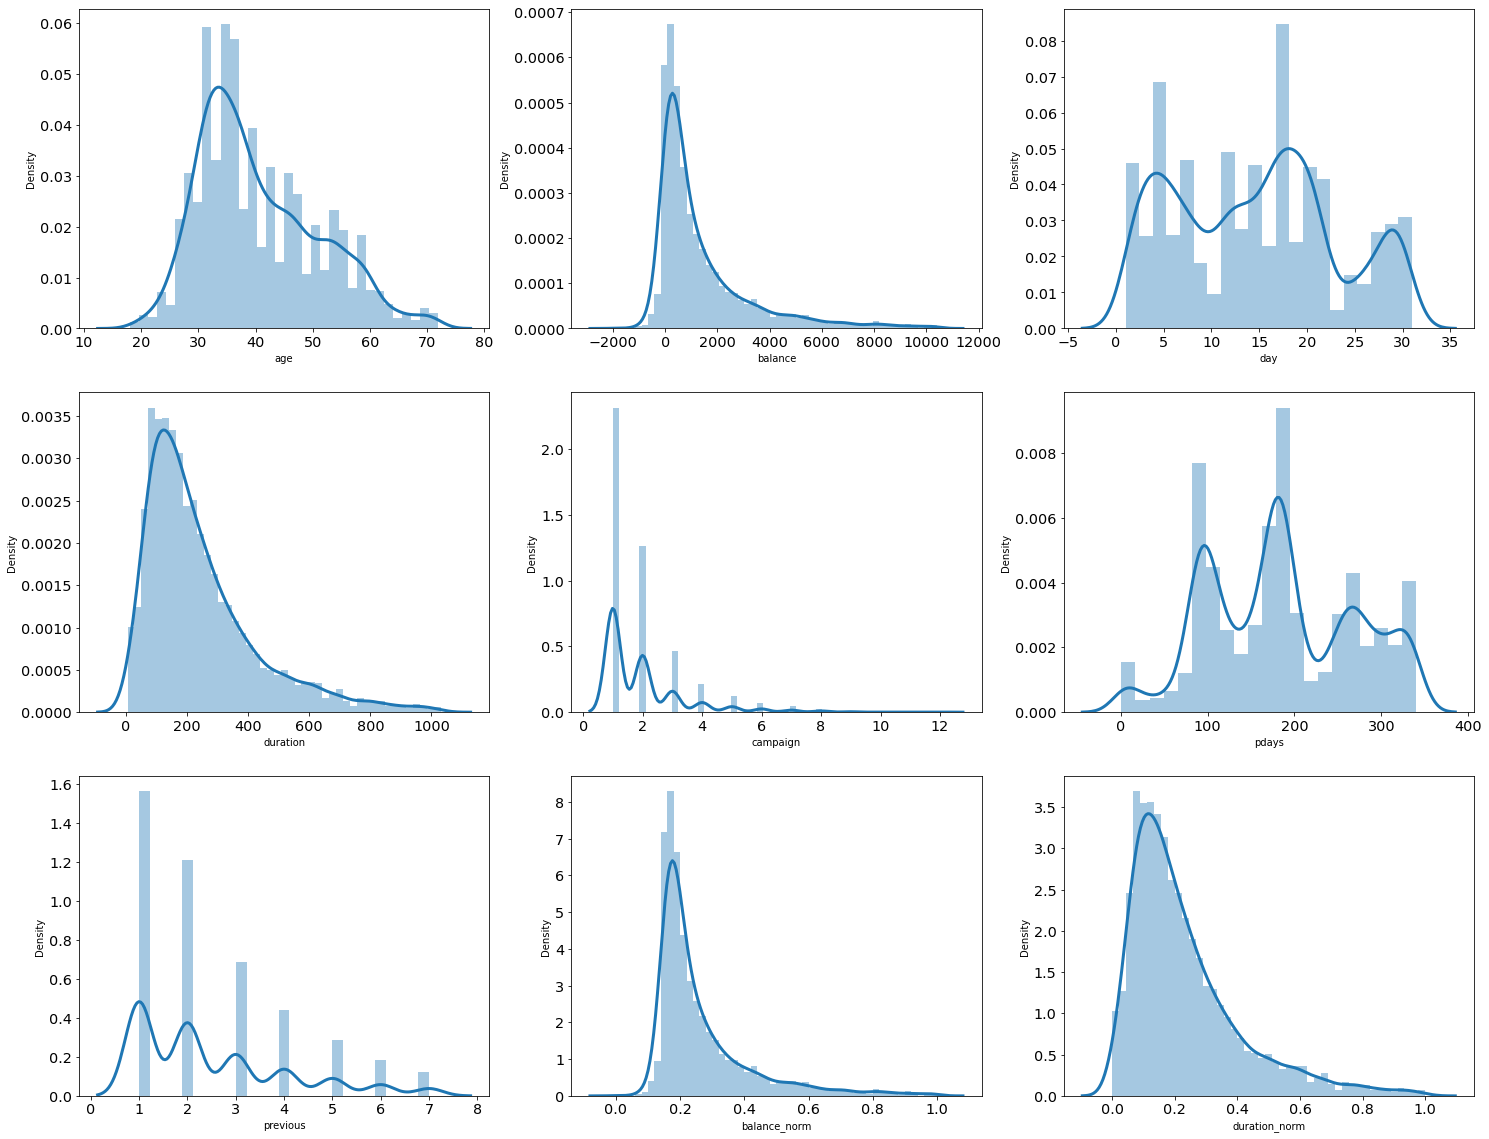

In [ ]:
plt.figure(figsize=(25,20))
for i in enumerate(df_final.describe().columns):
  plt.subplot(3,3,i[0]+1)
  sns.distplot(df_final[i[1]])
plt.show()

## 4. FEATURE ENCODING

In [ ]:
df_final

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balance_norm,duration_norm,campaign_norm
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no,0.225061,0.033171,0.000000
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes,0.133198,0.501463,0.000000
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes,0.433523,0.135610,0.000000
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no,0.349797,0.066341,0.000000
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes,0.153295,0.131707,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45190,32,blue-collar,married,secondary,no,136,no,no,cellular,16,nov,206,1,188,3,success,yes,0.164361,0.196098,0.000000
45193,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes,0.166233,0.433171,0.090909
45194,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no,0.164524,0.153171,0.090909
45195,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes,0.246542,0.201951,0.000000


In [ ]:
# Melakukan Label Encoding

mapping_edu = {
    'primary': 0,  
    'secondary': 1,
    'tertiary': 2,  
}
df_final['education'] = df_final['education'].map(mapping_edu)

mapping_default = {
    'no': 0,
    'yes': 1   
}
df_final['default'] = df_final['default'].map(mapping_default)

mapping_house = {
    'no': 0,
    'yes': 1    
}
df_final['housing'] = df_final['housing'].map(mapping_house)

mapping_loan = {
    'no': 0,
    'yes': 1
}
df_final['loan'] = df_final['loan'].map(mapping_loan)

mapping_poutcome = {
    'failure' : 0, 
    'other': 1,
    'success': 2
}
df_final['poutcome'] = df_final['poutcome'].map(mapping_poutcome)

mapping_y = {
    'no': 0,
    'yes': 1
}
df_final['y'] = df_final['y'].map(mapping_y)


mapping_job = {
    'unemployed': 0,
    'retired': 1,
    'student': 2,
    'housemaid': 3,
    'self-employed': 4,
    'services': 5,
    'admin.': 6,
    'technician': 7,
    'entrepreneur': 8,
    'blue-collar': 9,
    'management': 10,
}
df_final['job'] = df_final['job'].map(mapping_job)

# Melakukan OneHot Encoding
df_new = pd.get_dummies(df_final,columns=['marital', 'contact'])
df_new

,age,job,education,default,balance,housing,loan,day,month,duration,...,poutcome,y,balance_norm,duration_norm,campaign_norm,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone
24060,33,6,2,0,882,0,0,21,oct,39,...,0,0,0.225061,0.033171,0.000000,0,1,0,0,1
24062,42,6,1,0,-247,1,1,21,oct,519,...,1,1,0.133198,0.501463,0.000000,0,0,1,0,1
24064,33,5,1,0,3444,1,0,21,oct,144,...,0,1,0.433523,0.135610,0.000000,0,1,0,0,1
24072,36,10,2,0,2415,1,0,22,oct,73,...,1,0,0.349797,0.066341,0.000000,0,1,0,0,1
24077,36,10,2,0,0,1,0,23,oct,140,...,0,1,0.153295,0.131707,0.000000,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45190,32,9,1,0,136,0,0,16,nov,206,...,2,1,0.164361,0.196098,0.000000,0,1,0,1,0
45193,28,4,2,0,159,0,0,16,nov,449,...,2,1,0.166233,0.433171,0.090909,0,0,1,1,0
45194,59,10,2,0,138,1,1,16,nov,162,...,0,0,0.164524,0.153171,0.090909,0,1,0,1,0
45195,68,1,1,0,1146,0,0,16,nov,212,...,2,1,0.246542,0.201951,0.000000,0,1,0,1,0


In [ ]:
df_new = df_new.drop(['balance', 'duration', 'campaign', 'pdays', 'day', 'month'], axis=1)
df_new

,age,job,education,default,housing,loan,previous,poutcome,y,balance_norm,duration_norm,campaign_norm,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone
24060,33,6,2,0,0,0,3,0,0,0.225061,0.033171,0.000000,0,1,0,0,1
24062,42,6,1,0,1,1,1,1,1,0.133198,0.501463,0.000000,0,0,1,0,1
24064,33,5,1,0,1,0,4,0,1,0.433523,0.135610,0.000000,0,1,0,0,1
24072,36,10,2,0,1,0,4,1,0,0.349797,0.066341,0.000000,0,1,0,0,1
24077,36,10,2,0,1,0,3,0,1,0.153295,0.131707,0.000000,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45190,32,9,1,0,0,0,3,2,1,0.164361,0.196098,0.000000,0,1,0,1,0
45193,28,4,2,0,0,0,4,2,1,0.166233,0.433171,0.090909,0,0,1,1,0
45194,59,10,2,0,1,1,5,0,0,0.164524,0.153171,0.090909,0,1,0,1,0
45195,68,1,1,0,0,0,6,2,1,0.246542,0.201951,0.000000,0,1,0,1,0


In [ ]:
df_new.corr() # Melihat bagaimana korelasi pada features berkategori numerical

,age,job,education,default,housing,loan,previous,poutcome,y,balance_norm,duration_norm,campaign_norm,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone
age,1.000000,-0.160051,-0.168218,-0.018741,-0.113924,0.036033,0.041630,0.001720,0.014361,0.084128,0.029678,0.020851,0.163130,0.322356,-0.453911,-0.103103,0.103103
job,-0.160051,1.000000,0.225319,0.015574,0.202033,0.043705,0.006849,-0.089519,-0.101795,-0.014730,-0.054573,0.026770,-0.042290,0.062407,-0.038286,0.042039,-0.042039
education,-0.168218,0.225319,1.000000,-0.010165,-0.120952,-0.051746,0.005366,0.088519,0.112739,0.039791,-0.033572,-0.004235,-0.025942,-0.146374,0.173799,0.078858,-0.078858
default,-0.018741,0.015574,-0.010165,1.000000,0.001903,0.059645,-0.013761,-0.029264,-0.029030,-0.059917,0.003431,0.005786,0.022351,-0.013098,-0.001010,0.008797,-0.008797
housing,-0.113924,0.202033,-0.120952,0.001903,1.000000,0.112502,-0.021775,-0.289655,-0.320264,-0.070527,-0.063158,0.041375,0.030379,0.068557,-0.093639,0.047887,-0.047887
loan,0.036033,0.043705,-0.051746,0.059645,0.112502,1.000000,-0.008084,-0.115891,-0.136670,-0.100837,-0.038360,0.008704,0.005785,0.085904,-0.095663,0.021121,-0.021121
previous,0.041630,0.006849,0.005366,-0.013761,-0.021775,-0.008084,1.000000,0.059328,0.073290,-0.002569,0.032527,0.143811,-0.017279,0.036737,-0.027651,-0.039647,0.039647
poutcome,0.001720,-0.089519,0.088519,-0.029264,-0.289655,-0.115891,0.059328,1.000000,0.452600,0.013129,0.141081,0.003462,-0.012284,-0.060522,0.072908,-0.007205,0.007205
y,0.014361,-0.101795,0.112739,-0.029030,-0.320264,-0.136670,0.073290,0.452600,1.000000,0.047651,0.338219,-0.077648,-0.031475,-0.041134,0.065077,0.024143,-0.024143
balance_norm,0.084128,-0.014730,0.039791,-0.059917,-0.070527,-0.100837,-0.002569,0.013129,0.047651,1.000000,0.048175,-0.001339,-0.003916,0.032628,-0.032231,-0.040548,0.040548


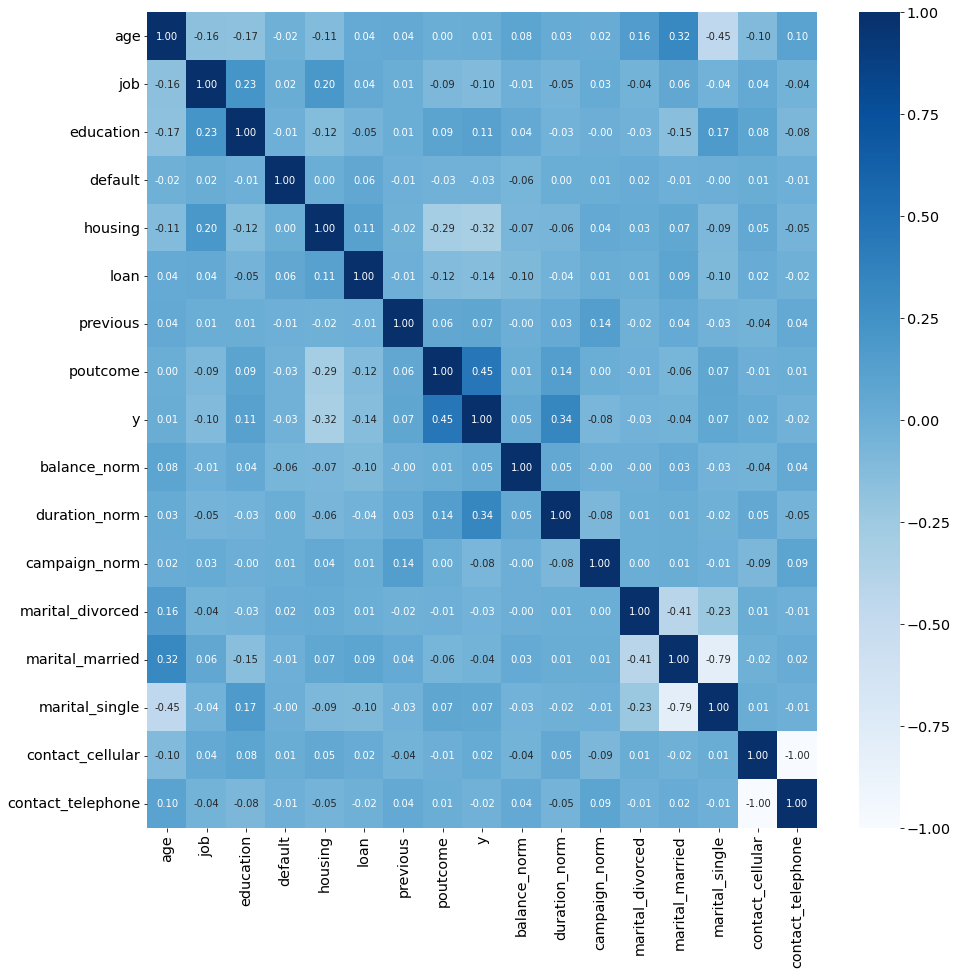

In [ ]:
plt.figure(figsize=(15, 15)) # Melihat korelasi menggunakan heatmap
sns.heatmap(df_new.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

## 5. CLASS IMBALANCE

0    4175
1    1252
Name: y, dtype: int64


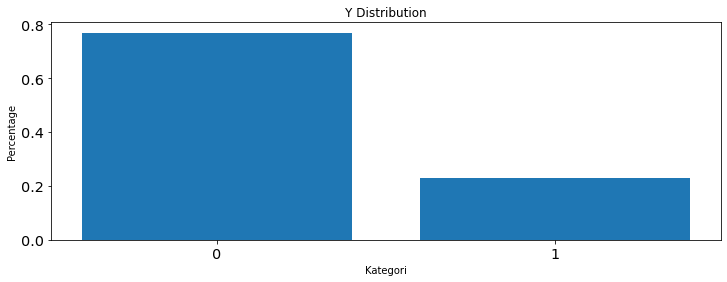

In [ ]:
# Melihat distribusi target pada feature 'y' antara users yang subscribe deposit (y atau 1) dan tidak subscribe (n atau 0).
dist_y = df_new['y'].value_counts()
print(dist_y)


plt.bar(dist_y.index.astype(str), dist_y.values/sum(dist_y.values))
plt.title('Y Distribution')
plt.xlabel('Kategori')
plt.ylabel('Percentage')
plt.show()

In [ ]:
from imblearn import under_sampling, over_sampling

In [ ]:
# pemisahan features vs target
X = df_new[[col for col in df_new.columns if (str(df_new[col].dtype) != 'object') and col not in ['y']]]
y = df_new['y'].values
print(X.shape)
print(y.shape)

(5427, 16)
(5427,)


In [ ]:
# Menggunakan SMOTE oversampling dan undersampling
X_undersampling , y_undersampling = under_sampling.RandomUnderSampler().fit_resample(X, y)
X_oversampling , y_oversampling = over_sampling.SMOTE().fit_resample(X,y)

In [ ]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_undersampling).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_oversampling).value_counts())

Original
0    4175
1    1252
dtype: int64


UNDERSAMPLING
0    1252
1    1252
dtype: int64


OVERSAMPLING
0    4175
1    4175
dtype: int64


## 6. EVALUATION

### Pemisahan features dan target

In [ ]:
from imblearn import under_sampling, over_sampling

# Separate our features and our target variable
X = df_new[[col for col in df_new.columns if (str(df_new[col].dtype) != 'object') and col not in ['y']]]
y = df_new['y'].values

# Split our data in training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
df_new.shape

(5427, 17)

In [ ]:
X_train.shape

(3798, 16)

In [ ]:
X_train.head()

,age,job,education,default,housing,loan,previous,poutcome,balance_norm,duration_norm,campaign_norm,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone
42640,64,1,2,0,0,0,2,0,0.327339,0.219512,0.000000,0,1,0,1,0
33996,29,10,2,0,0,0,4,1,0.160700,0.091707,0.000000,0,0,1,1,0
41750,56,0,1,0,0,0,1,0,0.154272,0.493659,0.181818,0,1,0,1,0
28162,48,5,1,0,1,1,1,0,0.164117,0.435122,0.000000,0,0,1,1,0
38375,41,10,2,0,1,0,4,0,0.196094,0.218537,0.363636,0,1,0,1,0


In [ ]:
X_test.shape

(1629, 16)

In [ ]:
X_test.head()

,age,job,education,default,housing,loan,previous,poutcome,balance_norm,duration_norm,campaign_norm,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone
24560,41,0,0,0,1,0,1,0,0.198617,0.149268,0.000000,0,1,0,1,0
42095,37,10,0,0,0,0,3,2,0.275834,0.093659,0.181818,0,1,0,1,0
30905,33,9,2,0,0,0,1,2,0.210252,0.118049,0.000000,0,0,1,1,0
24911,36,7,1,0,1,0,3,0,0.262734,0.075122,0.000000,0,1,0,1,0
25986,37,10,2,0,1,0,4,0,0.587795,0.093659,0.090909,0,0,1,1,0


In [ ]:
y_train.shape

(3798,)

In [ ]:
y_test.shape

(1629,)

In [ ]:
#Base
import pandas as pd
import numpy as np

#Plotting
import seaborn as sns
import matplotlib.pyplot as plt

#Disable Warnings
import warnings
warnings.filterwarnings("ignore")

#Machine learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

#Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

#Train-Test Split
from sklearn.model_selection import train_test_split

#Cross Validation
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedStratifiedKFold

#Grid Search
from sklearn.model_selection import GridSearchCV

#Save Model
import pickle
import requests
import json

In [ ]:
# Modelling Algorithms

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

## Collect all model in one list
all_model = [DecisionTreeClassifier,
            LogisticRegression,
             KNeighborsClassifier,
             GaussianNB,
            SVC,
            LinearSVC,
            RandomForestClassifier,
            GradientBoostingClassifier,
            ExtraTreesClassifier,
             XGBClassifier]

model_name = ['DecisionTreeClassifier',
            'LogisticRegression',
             'KNeighborsClassifier',
             'GaussianNB',
            'SVC',
            'LinearSVC',
            'RandomForestClassifier',
            'GradientBoostingClassifier',
            'ExtraTreesClassifier',
             'XGBClassifier']
## loop for all model

datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for idx, model_type in enumerate(all_model):
    num = 1
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    AucTemp = []
    nfold = 1
    for train_index,test_index in kf.split(X,y): 

        print("----------BEFORE------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = model_type()
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        AccTrain.append(model.score(X_train , y_train))
        AccTest.append(model.score(X_test , y_test))
        RecallTemp.append(recall_score(y_test,y_pred))
        PrecisionTemp.append(precision_score(y_test,y_pred))
        AucTemp.append(roc_auc_score(y_test, y_pred))
        
        print("----------AFTER------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        nfold += 1
    
    print("----------FINAL------------")
    print("{} Acc Train: {}".format(model_name[idx], np.mean(AccTrain)))
    print("{} Acc Test: {}".format(model_name[idx], np.mean(AccTest)))
    print("{} Recall: {}".format(model_name[idx], np.mean(RecallTemp)))
    print("{} Precission: {}".format(model_name[idx], np.mean(PrecisionTemp)))
    print("{} AUC: {}".format(model_name[idx], np.mean(AucTemp)))
    print("---------------------------")
    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))
    auc.append(np.mean(AucTemp))

----------BEFORE------------
DecisionTreeClassifier Acc Train: [], 1 of KFold 5
DecisionTreeClassifier Acc Test: [], 1 of KFold 5
DecisionTreeClassifier Recall: [], 1 of KFold 5
DecisionTreeClassifier Precission: [], 1 of KFold 5
DecisionTreeClassifier AUC: [], 1 of KFold 5
---------------------------
----------AFTER------------
DecisionTreeClassifier Acc Train: [1.0], 1 of KFold 5
DecisionTreeClassifier Acc Test: [0.7918968692449355], 1 of KFold 5
DecisionTreeClassifier Recall: [0.5776892430278885], 1 of KFold 5
DecisionTreeClassifier Precission: [0.5471698113207547], 1 of KFold 5
DecisionTreeClassifier AUC: [0.7169883340887945], 1 of KFold 5
---------------------------
----------BEFORE------------
DecisionTreeClassifier Acc Train: [1.0], 2 of KFold 5
DecisionTreeClassifier Acc Test: [0.7918968692449355], 2 of KFold 5
DecisionTreeClassifier Recall: [0.5776892430278885], 2 of KFold 5
DecisionTreeClassifier Precission: [0.5471698113207547], 2 of KFold 5
DecisionTreeClassifier AUC: [0.71

In [ ]:
## compare model each other
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['AUC']=auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
7,GradientBoostingClassifier,0.869173,0.847981,0.713765,0.572666,0.751603,2.119121e-02
9,XGBClassifier,0.862309,0.844482,0.709725,0.553524,0.742630,1.782708e-02
6,RandomForestClassifier,1.000000,0.838767,0.691498,0.547920,0.736954,1.612326e-01
1,LogisticRegression,0.837756,0.834161,0.676862,0.541524,0.731720,3.594289e-03
8,ExtraTreesClassifier,1.000000,0.826606,0.655171,0.526336,0.721491,1.733941e-01
5,LinearSVC,0.820664,0.820528,0.655702,0.551764,0.726421,1.364369e-04
2,KNeighborsClassifier,0.851161,0.789571,0.569013,0.357820,0.638431,6.158958e-02
3,GaussianNB,0.780357,0.780545,0.517189,0.757979,0.772642,1.877483e-04
0,DecisionTreeClassifier,1.000000,0.776672,0.515391,0.540711,0.694068,2.233280e-01
4,SVC,0.769302,0.769302,0.000000,0.000000,0.500000,1.468970e-07


In [ ]:
#Grid Search

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression()

param = dict()
param['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
param['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
param['C'] = [0.00001, 0.0001, 0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20, 100]

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

In [ ]:
clf1 = GridSearchCV(model,param,  scoring='roc_auc', n_jobs=-1, cv=cv, verbose = True)
clf1.fit(X,y)

Fitting 15 folds for each of 240 candidates, totalling 3600 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.003, 0.005, 0.01, 0.03,
                               0.05, 0.1, 0.3, 0.5, 1, 2, 3, 3, 4, 5, 10, 20,
                               100],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='roc_auc', verbose=True)

In [ ]:
clf2 = GridSearchCV(model,param,  scoring='accuracy', n_jobs=-1, cv=cv, verbose = True)
clf2.fit(X,y)

Fitting 15 folds for each of 240 candidates, totalling 3600 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.003, 0.005, 0.01, 0.03,
                               0.05, 0.1, 0.3, 0.5, 1, 2, 3, 3, 4, 5, 10, 20,
                               100],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=True)

In [ ]:
print('Best Score: {}'.format(clf1.best_score_))
print('Best Hyperparameters: {}'.format(clf1.best_params_))

Best Score: 0.8703809668312776
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
print('Best Score: {}'.format(clf2.best_score_))
print('Best Hyperparameters: {}'.format(clf2.best_params_))

Best Score: 0.836743358425768
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train dataset shape: ", X_train.shape)
print("y_train dataset shape: ", y_train.shape)
print("X_test dataset shape: ", X_test.shape)
print("y_test dataset shape: ", y_test.shape)

X_train dataset shape:  (3798, 16)
y_train dataset shape:  (3798,)
X_test dataset shape:  (1629, 16)
y_test dataset shape:  (1629,)


In [ ]:
# Melakukan Tuning Hyperparameter pada Model GradientBoostingClassifier dan Melakukan Pengecekan Score

modeltun = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model_fit = modeltun.fit(X_train,y_train)
y_pred_train=model_fit.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2897
           1       0.75      0.61      0.67       901

    accuracy                           0.86      3798
   macro avg       0.82      0.77      0.79      3798
weighted avg       0.85      0.86      0.85      3798



In [ ]:
# Memanggil Data Train

hasiltrain = pd.DataFrame(y_train)
hasiltrain['prediksi'] = y_pred_train
hasiltrain

,0,prediksi
0,0,1
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
3793,0,0
3794,1,1
3795,0,0
3796,0,1


Confusion Matrix: [[2719  355]
 [ 178  546]]


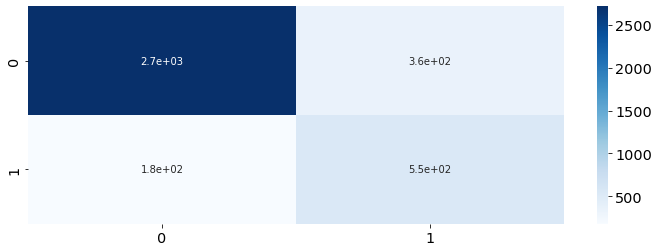

In [ ]:
# Melakukan Visualisasi : Matrix Confusion pada Data Train

cm_train = confusion_matrix(y_pred_train, y_train)
print('Confusion Matrix: {}'.format(cm_train))
## visualisasi
sns.heatmap(cm_train, annot=True, cmap="Blues")

In [ ]:
# Melakukan pengecekan score terhadap hasil Data Test

y_pred_test=model_fit.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1278
           1       0.69      0.56      0.62       351

    accuracy                           0.85      1629
   macro avg       0.78      0.74      0.76      1629
weighted avg       0.84      0.85      0.84      1629



In [ ]:
# Memanggil Hasil dari Data Test

hasiltest = pd.DataFrame(y_test)
hasiltest['Prediksi'] = y_pred_test
hasiltest

,0,Prediksi
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
1624,0,0
1625,0,0
1626,1,1
1627,0,0


Confusion Matrix: [[1188  155]
 [  90  196]]


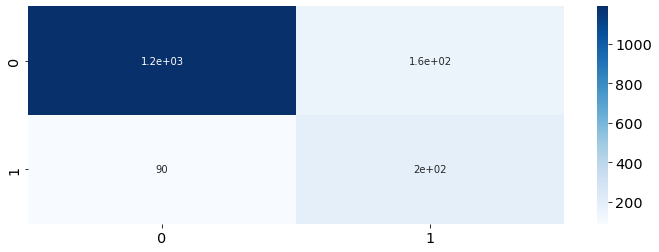

In [ ]:
# Melakukan Visualisasi Confusion Matrix atas Data Test

cm_test = confusion_matrix(y_pred_test, y_test)
print('Confusion Matrix: {}'.format(cm_test))
## visualisasi
sns.heatmap(cm_test, annot=True, cmap="Blues")

Terimakasih